# Macro Analysis of Liver Transplant Centers' Performance

The purpose of this executive summary is to share some findings from a macro-level analysis of liver transplant programs based on public information published by SRTR in program-specific reports (PSRs). The specific question that motivated this exercise is the following: Is the rate at which an adult liver transplant program accepts deceased donor organ offers correlated to the programs overall outcomes? While there is an obvious trade-off between time on waitlist and deceased donor organ quality accepted for transplant, it is not obvious what organ acceptance policy is optimal. This analysis attempts to gain insights by looking at variations in liver transplant program performance.

In order to address this question as simply as possible a metric for "overall program outcomes" was devised. SRTR uses three metrics to rate liver transplant programs: 1) survival on the waitlist, 2) getting a deceased donor transplant faster and 3) 1-year liver survival (post transplant). Instead of complicating the analysis by using three separate metrics this analysis rates transplant programs using a single metric calculated by essentially taking the total number of patients that receive a deceased donor liver transplant and survive for one year during the "observation period" and dividing that number by the total number of patients in the program during that period. There _are_ details that are worth further explanation but for the sake of brevity of this executive summary these details are deferred to the last chart.

The following few charts summarize the primary findings of this analysis.

In [1]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime
import json
import zipfile
import os

from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [2]:
# read csv with collected liver transplant centers' data into a dataframe 
liver_centers = pd.read_csv('liver_centers.csv')
liver_centers.head()

,Unnamed: 0,CenterName,WL_start_2018,WL_start_2017,WL_start_2016,WL_adds_2018,WL_adds_2017,WL_adds_2016,WL_xfer_2018,WL_xfer_2017,...,Outlier,mean_time_to_xplant,TR_meld_6-10,TR_meld_11-14,TR_meld_15-20,TR_meld_21-30,TR_meld_31-40,TR_status1A,optn_region,intercept
0,ALUA,"""University of Alabama Hospital""",114,78,113,204,204,140,5,0,...,False,5.6,13.4,18.5,31.9,19.3,15.1,1.7,3,1
1,ARUA,"""UAMS Medical Center""",55,31,42,54,65,52,1,1,...,False,6.9,8.1,16.2,32.4,27.0,16.2,0.0,3,1
2,AZGS,"""Banner-University Medical Center Phoenix""",51,80,78,140,108,113,1,3,...,False,9.1,14.2,15.0,20.8,17.5,31.7,0.8,5,1
3,AZMC,"""Mayo Clinic Hospital""",112,126,160,145,127,130,3,5,...,False,4.2,16.4,23.4,27.3,20.3,9.4,3.1,5,1
4,AZSJ,"""St. Joseph's Hospital and Medical Center""",13,10,6,41,23,23,1,1,...,False,8.7,22.7,9.1,18.2,40.9,9.1,0.0,5,1


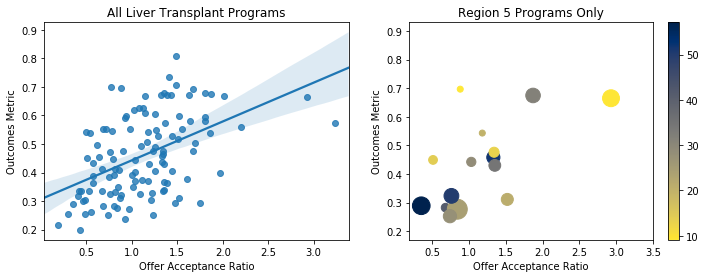

In [3]:
# Scatter plot OfferAcceptRatio against Metric
fig, axes = plt.subplots(1,2,squeeze=False,figsize = (12,4))
plt.sca(axes[0,0])
sb.regplot(data=liver_centers[(liver_centers.very_small == False)], x='OfferAcceptRatio', y='Metric')
plt.title('All Liver Transplant Programs')
plt.xlabel('Offer Acceptance Ratio')
plt.ylabel('Outcomes Metric')

# Scatter plot OfferAcceptRatio against Metric for region 5 only
plt.sca(axes[0,1])
#sb.regplot(data=liver_centers[(liver_centers.very_small == False) & (liver_centers.optn_region == 5)], x='OfferAcceptRatio', y='Metric')
plt.scatter(data=liver_centers[(liver_centers.very_small == False) & (liver_centers.optn_region == 5)], x='OfferAcceptRatio', y='Metric', s='TR_1yr_eval', c='TR_meld_31-40')
plt.set_cmap('cividis_r')
plt.colorbar()
plt.ylim(bottom=0.17, top=0.93)
plt.xlim(right=3.5)
plt.title('Region 5 Programs Only')
plt.xlabel('Offer Acceptance Ratio')
plt.ylabel('Outcomes Metric');

These two scatter plots illustrate the primary findings from this exercise. The plot on the left shows outcomes metric vs Offer Acceptance Ratio for all 115 liver transplant programs. The Offer Acceptance Ratio is a metric published in the PSR to indicate whether the program is more or less likely to accept donated organ offers than the average program. A linear regression line is included along with 95% confidence interval. This plot illustrates the positive correlation between the outcomes metric and offer acceptance ratio (correlation coeficient of 0.48).

The right scatter plot only contains liver transplant programs in OPTN Region 5. The horizontal and vertical axes are the same but this plot has additional variables encoded. The size of each marker is encoded with the number of deceased donor transplants evaluated in the latest PSR (i.e., size of the program). The color of each marker is encoded with the percentage of patients transplanted that had a MELD between 31 and 40 at the time of transplant (i.e., how sick patients were at time of transplant). 

## Conclusions
This macro-level analysis of liver transplant center outcomes suggests that programs with a higher deceased donor organ offer acceptance ratio generally have better overall outcomes. Of course the medical team's professional evaluation of the medical characteristics of the transplant recepient and organ donor must ultimately guide any offer acceptance decision; however, I believe that data science can provide meaningful support. Humans are generally not very adept at systematically evaluating large numbers of parameters in making optimal decisions whereas it has been demonstrated that computers executing machine learning algorithms can process large amounts of data and find important correlations. I believe that this technology can be applied to the full SRTR database and provide insights into which deceased donor livers that might be considered marginal can in fact be promising matches given certain transplant recepient characteristics. With these types of insights a liver transplant program could potentially increase its offer acceptance ratio, increase its transplant rate, reduce mean time on transplant waitlist, reduce its percentage of high MELD scores at transplant and improve overall outcomes. 

The entire exploratory data analysis is available along with all of the other scripts used to extract, clean and analyze the data in [GitHub](https://github.com/bcollins92078/SRTS_liver_center).

<a id='metric'></a>
## Liver Transplant Center Outcomes Metric

The "overall outcomes metric" used in this analysis uses the one-year transplant survival data in the PSRs in Table C6. This data is based on a 2.5 year observation period and more time resolution does not appear to be available from this source. This metric takes the one-year transplant survival counts as the primary program "successes" but also counts recoveries while on the waitlist as successful outcomes. These are the counts of patients whose conditions improve while on the waitlist to the point that they no longer need a transplant. Recoveries are reported in Table B1 with resolution to 1 year. The sum of one-year transplant survivals (reported for 01/01/2016 thru 06/30/2018) and the recoveries for the 2 years 2016 and 2017 form the numerator of the outcomes metric. The denominator is formed by summing the number of patients on the waitlist at the start of 2016, the waitlist additions in 2016 and 2017, then subtracting the patients that transferred care elsewhere or received a transplant at another center in 2016 and 2017. All of these counts for the denominator come from Table B1 and are reported with one-year resolution. So note that the numerator and denominator do _not_ line up perfectly in time. Also note that waitlist removals due to deaths and patients condition deterioration effectively count _against_ the programs overall outcomes metric just as failed transplants do.